In [15]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score , precision_score,recall_score ,f1_score

In [16]:
data = pd.read_csv('data.csv')

#Exploratory Data Analysis (EDA)

print(data.info())
print(data.describe())

data['search_term'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504989 entries, 0 to 504988
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   search_term                         504989 non-null  object 
 1   product_variant_id                  504989 non-null  object 
 2   city_id                             504989 non-null  object 
 3   query_type                          504989 non-null  object 
 4   is_clicked                          504989 non-null  float64
 5   total_clicks                        504989 non-null  int64  
 6   session_views                       504989 non-null  int64  
 7   query_products_clicks_last_30_days  504989 non-null  int64  
 8   CTR_last_30_days                    504989 non-null  float64
 9   CTR_last_7_days                     504989 non-null  float64
 10  CTR_product_30_days                 504989 non-null  float64
 11  query_product_plt_clicks_6

search_term
comb        5947
combo       3194
zepto       2223
munch       2186
munchies    2150
            ... 
drag           2
volini         2
aavin          1
yam            1
caul           1
Name: count, Length: 1997, dtype: int64

In [17]:
data.head()

,search_term,product_variant_id,city_id,query_type,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,predicted_category_name,predicted_subcategory_name,query_product_plt_clicks_30_days,product_name,brand_name,category_name,subcategory_name,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
0,akshayakalpa milk,c442ad9b-09b6-4505-a17d-7d2b3cceee0e,ee66dc2a-aded-4445-a7b2-1ad63715725c,head,0.0,0,0,0,0.000000,0.0,0.000000,0,0.00000,0.234505,"{'Dairy, Bread & Eggs': 1, 'Cold Drinks & Juic...","{'Milk': 1, 'Milk Drinks': 0.5, 'Yogurts & Dah...",0,Cadbury Dairy Milk Chocolate Bar,Dairy Milk,Sweet Cravings,Chocolates,6.900000,0.040000,2.718400,0.000000,155,376,552508,167494,0.054913,0.384844
1,ice cubes,33e1c372-8f6b-4312-b4df-93911f4c1caf,7e926d2f-adad-4e5a-956f-f07fffa54164,head,0.0,0,57,0,0.000000,0.0,0.003239,0,0.00000,0.011633,"{'Ice Creams & More': 1, 'Zepto Cafe': 2}",{'Ice Cubes & Ice Pops': 1},0,Noto Roasted Hazelnut Bar Ice Cream Stick,Noto,Ice Creams & More,Sticks,42.010000,0.250000,5.009091,0.000000,14,41,3264,1313,0.003239,0.324977
2,protien,8ed8801e-f3bd-46ed-a212-24dcaa33d937,078d5e32-627a-4907-8df8-4360bc7c06da,head,1.0,29,545,9,0.040179,0.0,0.061085,317,0.05352,0.066489,"{'Munchies': 1, 'Health & Wellness': 0.5, 'Zep...","{'Energy Bars': 1, 'Fitness': 0.5, 'Cookies': ...",198,RiteBite Max Protein Cookies Choco Chips Biscu...,Max Protien,Munchies,Energy Bars,10.243929,0.160000,3.239500,18.622949,1469,3335,55215,24085,0.061085,0.220603
3,comb,b16224dd-5b0b-4e39-91d0-b52e563c70c2,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,head,0.0,0,13,0,0.000000,0.0,0.000000,0,0.00000,0.258667,"{'Cleaning Essentials': 1, 'Electricals & Acce...","{'Laundry Additives': 1, 'Home Electronics': 0...",0,Bisleri Packaged Drinking Water Jar,Bisleri,Cold Drinks & Juices,Water,21.433421,0.000000,5.118421,0.000000,14567,28849,216304,121334,0.120340,0.061622
4,nail polish remover,25efac15-9a86-4da1-ab36-94e32bc7ecd9,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,tail,0.0,0,1,0,0.000000,0.0,0.052714,0,0.00000,0.000000,"{'Makeup & Beauty': 1, 'Grooming Essentials': ...","{'Nails': 1, 'Beauty Accessories': 0.5, 'Hygie...",0,Veet Hair Removal Wax Strips - Sensitive Skin,Veet,Feminine Hygiene,Hair Removal,13.487105,0.036957,4.915103,20.365139,1043,2446,14527,6418,0.052714,0.390254


In [18]:
data.isnull().sum()

search_term                               0
product_variant_id                        0
city_id                                   0
query_type                                0
is_clicked                                0
total_clicks                              0
session_views                             0
query_products_clicks_last_30_days        0
CTR_last_30_days                          0
CTR_last_7_days                           0
CTR_product_30_days                       0
query_product_plt_clicks_60_days          0
query_product_plt_ctr_60_days             0
CTR_plt_30_days                           0
predicted_category_name                   0
predicted_subcategory_name                0
query_product_plt_clicks_30_days          0
product_name                          11019
brand_name                            63744
category_name                         11019
subcategory_name                      11019
latest_margin                             0
savings                         

In [19]:
# handling the query_type feature with encoding
df1 = pd.get_dummies(data['query_type'])
new_df = pd.concat([data,df1],axis=1)
new_df.drop('query_type',axis=1,inplace=True)
new_df.head()

,search_term,product_variant_id,city_id,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,predicted_category_name,predicted_subcategory_name,query_product_plt_clicks_30_days,product_name,brand_name,category_name,subcategory_name,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity,head,tail
0,akshayakalpa milk,c442ad9b-09b6-4505-a17d-7d2b3cceee0e,ee66dc2a-aded-4445-a7b2-1ad63715725c,0.0,0,0,0,0.000000,0.0,0.000000,0,0.00000,0.234505,"{'Dairy, Bread & Eggs': 1, 'Cold Drinks & Juic...","{'Milk': 1, 'Milk Drinks': 0.5, 'Yogurts & Dah...",0,Cadbury Dairy Milk Chocolate Bar,Dairy Milk,Sweet Cravings,Chocolates,6.900000,0.040000,2.718400,0.000000,155,376,552508,167494,0.054913,0.384844,True,False
1,ice cubes,33e1c372-8f6b-4312-b4df-93911f4c1caf,7e926d2f-adad-4e5a-956f-f07fffa54164,0.0,0,57,0,0.000000,0.0,0.003239,0,0.00000,0.011633,"{'Ice Creams & More': 1, 'Zepto Cafe': 2}",{'Ice Cubes & Ice Pops': 1},0,Noto Roasted Hazelnut Bar Ice Cream Stick,Noto,Ice Creams & More,Sticks,42.010000,0.250000,5.009091,0.000000,14,41,3264,1313,0.003239,0.324977,True,False
2,protien,8ed8801e-f3bd-46ed-a212-24dcaa33d937,078d5e32-627a-4907-8df8-4360bc7c06da,1.0,29,545,9,0.040179,0.0,0.061085,317,0.05352,0.066489,"{'Munchies': 1, 'Health & Wellness': 0.5, 'Zep...","{'Energy Bars': 1, 'Fitness': 0.5, 'Cookies': ...",198,RiteBite Max Protein Cookies Choco Chips Biscu...,Max Protien,Munchies,Energy Bars,10.243929,0.160000,3.239500,18.622949,1469,3335,55215,24085,0.061085,0.220603,True,False
3,comb,b16224dd-5b0b-4e39-91d0-b52e563c70c2,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,0.0,0,13,0,0.000000,0.0,0.000000,0,0.00000,0.258667,"{'Cleaning Essentials': 1, 'Electricals & Acce...","{'Laundry Additives': 1, 'Home Electronics': 0...",0,Bisleri Packaged Drinking Water Jar,Bisleri,Cold Drinks & Juices,Water,21.433421,0.000000,5.118421,0.000000,14567,28849,216304,121334,0.120340,0.061622,True,False
4,nail polish remover,25efac15-9a86-4da1-ab36-94e32bc7ecd9,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,0.0,0,1,0,0.000000,0.0,0.052714,0,0.00000,0.000000,"{'Makeup & Beauty': 1, 'Grooming Essentials': ...","{'Nails': 1, 'Beauty Accessories': 0.5, 'Hygie...",0,Veet Hair Removal Wax Strips - Sensitive Skin,Veet,Feminine Hygiene,Hair Removal,13.487105,0.036957,4.915103,20.365139,1043,2446,14527,6418,0.052714,0.390254,False,True


In [20]:

#removing the categorical data as they will not much impact the result
#encoding these categorical features will lead to a very large computation and large number of columns

df=new_df.copy()
new_df = new_df.drop(['product_name','brand_name','category_name','subcategory_name','search_term','product_variant_id','city_id','predicted_category_name','predicted_subcategory_name'] ,axis=1)

new_df.head()

,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,query_product_plt_clicks_30_days,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity,head,tail
0,0.0,0,0,0,0.000000,0.0,0.000000,0,0.00000,0.234505,0,6.900000,0.040000,2.718400,0.000000,155,376,552508,167494,0.054913,0.384844,True,False
1,0.0,0,57,0,0.000000,0.0,0.003239,0,0.00000,0.011633,0,42.010000,0.250000,5.009091,0.000000,14,41,3264,1313,0.003239,0.324977,True,False
2,1.0,29,545,9,0.040179,0.0,0.061085,317,0.05352,0.066489,198,10.243929,0.160000,3.239500,18.622949,1469,3335,55215,24085,0.061085,0.220603,True,False
3,0.0,0,13,0,0.000000,0.0,0.000000,0,0.00000,0.258667,0,21.433421,0.000000,5.118421,0.000000,14567,28849,216304,121334,0.120340,0.061622,True,False
4,0.0,0,1,0,0.000000,0.0,0.052714,0,0.00000,0.000000,0,13.487105,0.036957,4.915103,20.365139,1043,2446,14527,6418,0.052714,0.390254,False,True


In [21]:
pd.set_option('display.max_columns',None)
new_df.corr()

,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,query_product_plt_clicks_30_days,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity,head,tail
is_clicked,1.000000,0.051524,0.204488,0.049228,0.301190,0.242047,0.254466,0.073309,0.280107,0.206733,0.081034,-0.053335,-0.059343,0.028192,0.041413,0.100276,0.084168,0.081496,0.096370,0.171598,0.380413,0.155942,-0.155942
total_clicks,0.051524,1.000000,0.589319,0.972957,0.199735,0.177242,0.134375,0.527627,0.201529,0.114699,0.588553,-0.006423,-0.012209,-0.008207,-0.004752,0.221745,0.223791,0.117185,0.118175,0.118996,0.050271,0.017688,-0.017688
session_views,0.204488,0.589319,1.000000,0.568858,0.124805,0.110759,0.116517,0.386803,0.143625,0.097431,0.404975,-0.013272,-0.033622,-0.003258,0.012077,0.158846,0.151358,0.097864,0.105376,0.091443,0.137751,0.075169,-0.075169
query_products_clicks_last_30_days,0.049228,0.972957,0.568858,1.000000,0.198165,0.177934,0.132798,0.537072,0.194726,0.111915,0.612017,-0.006233,-0.011186,-0.008054,-0.004097,0.221870,0.222102,0.115850,0.116878,0.117760,0.047336,0.017030,-0.017030
CTR_last_30_days,0.301190,0.199735,0.124805,0.198165,1.000000,0.711948,0.352590,0.207959,0.667267,0.295082,0.256093,-0.032697,-0.035141,-0.000942,-0.005290,0.193275,0.163070,0.141528,0.161515,0.298747,0.173355,0.003688,-0.003688
CTR_last_7_days,0.242047,0.177242,0.110759,0.177934,0.711948,1.000000,0.279507,0.184292,0.558196,0.242211,0.228286,-0.026175,-0.028252,0.000978,0.000251,0.169911,0.144019,0.120383,0.137334,0.238608,0.150561,0.008725,-0.008725
CTR_product_30_days,0.254466,0.134375,0.116517,0.132798,0.352590,0.279507,1.000000,0.132786,0.317426,0.694516,0.156799,-0.083650,-0.122029,-0.012403,-0.005713,0.496249,0.478970,0.419184,0.439661,0.852937,0.126968,0.027306,-0.027306
query_product_plt_clicks_60_days,0.073309,0.527627,0.386803,0.537072,0.207959,0.184292,0.132786,1.000000,0.314729,0.166155,0.856264,-0.009538,-0.025404,-0.018673,-0.000928,0.123907,0.124127,0.223009,0.226620,0.116114,0.071098,0.026622,-0.026622
query_product_plt_ctr_60_days,0.280107,0.201529,0.143625,0.194726,0.667267,0.558196,0.317426,0.314729,1.000000,0.401835,0.282475,-0.038123,-0.056005,-0.005792,-0.005111,0.185097,0.158911,0.223007,0.250310,0.273348,0.196920,-0.003529,0.003529
CTR_plt_30_days,0.206733,0.114699,0.097431,0.111915,0.295082,0.242211,0.694516,0.166155,0.401835,1.000000,0.147830,-0.083021,-0.131344,-0.013817,0.002037,0.415415,0.378408,0.538523,0.587942,0.668847,0.113197,0.009529,-0.009529


<Axes: >

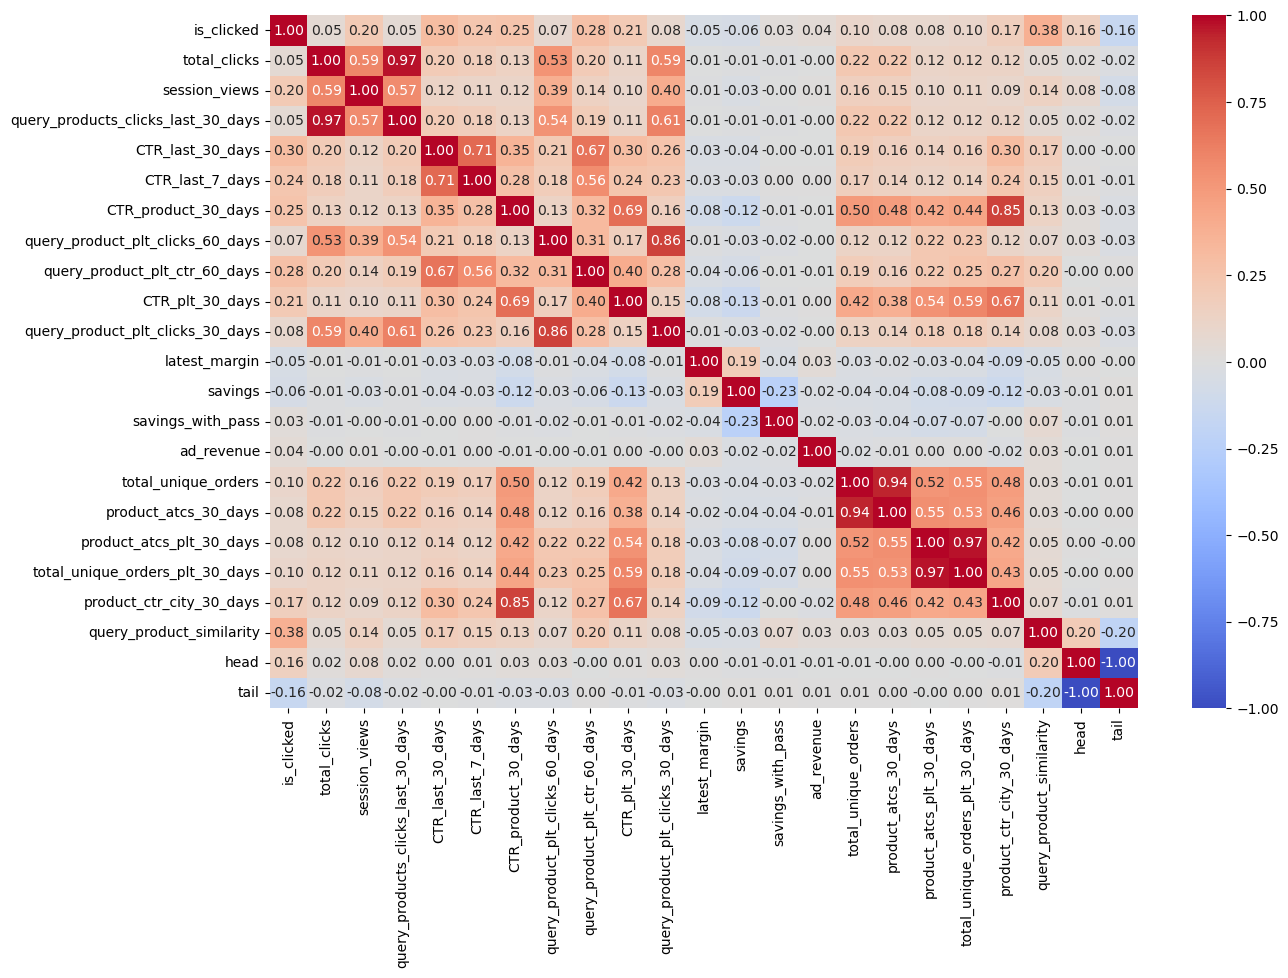

In [22]:
correlation_matrix=new_df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')

In [23]:
# taking more coorelated features with target variable with absolute value greater than 0.05

correlation_target = correlation_matrix['is_clicked'].sort_values(ascending=False)

important_features = correlation_target[abs(correlation_target) >= 0.05 ].index.tolist()

important_features.remove('is_clicked')  # Remove target variable from features

print("Selected Important Features:", important_features)

Selected Important Features: ['query_product_similarity', 'CTR_last_30_days', 'query_product_plt_ctr_60_days', 'CTR_product_30_days', 'CTR_last_7_days', 'CTR_plt_30_days', 'session_views', 'product_ctr_city_30_days', 'head', 'total_unique_orders', 'total_unique_orders_plt_30_days', 'product_atcs_30_days', 'product_atcs_plt_30_days', 'query_product_plt_clicks_30_days', 'query_product_plt_clicks_60_days', 'total_clicks', 'latest_margin', 'savings', 'tail']


In [24]:
X = new_df[important_features]
y = new_df['is_clicked']

sc=StandardScaler()
x=sc.fit_transform(X)

In [35]:
# Model operations

model = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # L1 or L2 regularization
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5, verbose=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model using cross-validation
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')

print(f'Cross-Validated AUC Scores: {cv_scores}')
print(f'Mean AUC: {np.mean(cv_scores):.2f}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\hk406\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hk406\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}


C:\Users\hk406\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hk406\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-Validated AUC Scores: [0.86896409 0.87123509 0.87061567 0.86775378 0.86794836]
Mean AUC: 0.87


C:\Users\hk406\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:

# Evaluate the best model on the test set
#best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {auc:.2f}')

y_pred_proba

Accuracy: 0.92
Precision: 0.96
Recall: 0.78
F1 Score: 0.86
AUC-ROC: 0.88


array([[0.9541832 , 0.0458168 ],
       [0.95794436, 0.04205564],
       [0.94645309, 0.05354691],
       ...,
       [0.96259534, 0.03740466],
       [0.96514725, 0.03485275],
       [0.92382875, 0.07617125]])

In [37]:
from sklearn.metrics import average_precision_score

In [38]:
# Ranking according to predicted probability based on search term and city level

# Pointwise ranking method is being used with relevance order based on predicted probability of 'is_clicked' target variable and query_product_similarity 

#using mAP score as we are dealing with binary relevance

def rank_products(search_term, city_id):
    # Filter products based on the search term and city
    filtered_data = df[(df['search_term'] == search_term) & (df['city_id'] == city_id)]
    
    if filtered_data.empty:
        print("No products found for the given search term and city.")
        return None
    
    # Prepare features for ranking
    X_rank = filtered_data[important_features]
    X_rank_transformed = sc.fit_transform(X_rank)
    #X_rank_transformed = pca.fit_transform(X_rank_transformed)
    
    # Predict probabilities for each product
    filtered_data['predicted_prob'] = best_model.predict_proba(X_rank_transformed)[:, 1]
    
    # Sort products by predicted probability
    ranked_products = filtered_data.sort_values(by=['predicted_prob','query_product_similarity'],ascending=False)
    
    y_true = ranked_products['is_clicked'].values
    y_scores = ranked_products['predicted_prob'].values
    
    mAp = average_precision_score(y_true, y_scores)
    
    return [ranked_products[['product_variant_id']],mAp]

# Example 
search_term = "protien"  
city_id = "078d5e32-627a-4907-8df8-4360bc7c06da"
ranked_products = rank_products(search_term, city_id)
if ranked_products is not None:
    print(ranked_products[0].head(20).reset_index(drop=True)) # Display top 20 ranked products
    print("Mean Average Precision Score is ",ranked_products[1])

                      product_variant_id
0   883b2387-8525-4158-ad02-66586bfb9295
1   aa7be367-5964-477c-b0a2-e9aaee748ee8
2   39b9c4e8-218b-472e-8724-a8b8b482bd90
3   cd58a955-5510-4ade-897b-dcc3efc0220e
4   4de79004-d3c1-463a-aedb-d8b824ae9846
5   d49d35c3-9aeb-478b-9ac0-6d6428834964
6   231d6fe0-170b-4520-b1f9-ae169ca79416
7   8ed8801e-f3bd-46ed-a212-24dcaa33d937
8   a2122104-a9b1-4bd9-8b7e-246c5e104545
9   e77b9d20-b5d2-416d-b106-78fa330b1888
10  81c278dd-99cc-4dad-b458-845b94c54fe2
11  68a5f9aa-8349-49ec-b3f7-4c7c807cbc4a
12  e0ff56af-0948-41cf-be28-e0081267565d
13  b23a0002-123a-4619-91db-b5a574657c24
14  9ef52ca6-c321-4107-9dec-afdd940b4d14
15  84344585-ac24-4a28-bb68-28a42eafe880
16  fe50d4b1-70c3-43ba-904d-42bd158f2665
17  7a829b12-e02a-4141-87e3-eeaf1bd132fb
18  f6f2a5f3-9d38-44c4-9de8-e13f9659837b
19  9c08efe4-18d1-4d8d-bb62-15ceec5433cb
Mean Average Precision Score is  0.9709114414996768


C:\Users\hk406\AppData\Local\Temp\ipykernel_456\1802031441.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['predicted_prob'] = best_model.predict_proba(X_rank_transformed)[:, 1]
